## 1) 用Python集成方法工具包解决回归问题


### 构建随机森林模型来预测红酒口感

本例用sklearn.ensemble.RandomForestRegressor来训练一组随机森林模型，将此模型应用在红酒数据集上，测试模型的性能。

一切都在代码及其注释中（本例要训练500组随机森林，所以要有点耐心等待程序运行完毕）。

注意：本例的运行结果统计波动比较大， 选定种子仅仅为了复现。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

/home/x/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


MSE
0.32340923920588643


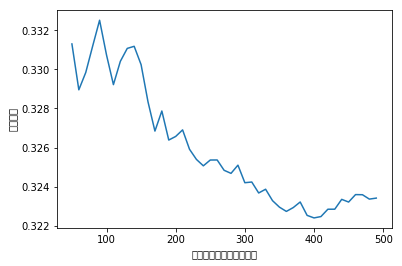

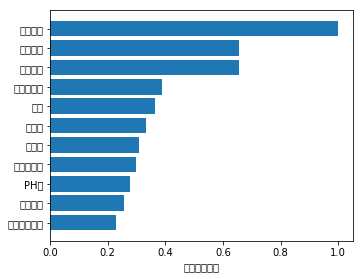

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error


# 获取红酒数据集
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(target_url, header=0, sep=";")
df.columns = ['非挥发性酸','挥发性酸','柠檬酸', '残留糖分', '氯化物', '游离二氧化硫','总二氧化硫', '密度', 
              'PH值', '亚硝酸盐', '酒精含量', '品质']

xData = df.values[:,:-1]; yData = df.values[:,-1] 
m, n = xData.shape

# 采样30%的数据作为测试集
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.30, random_state=1)

# 随机森林规模序列
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None # 允许决策树深度持续增长
    maxFeat  = 4 # 属性集数目，可试这调整
    wineRFModel = ensemble.RandomForestRegressor(
                            n_estimators=iTrees,  # 决策树的数目
                            max_depth=depth,      # 决策树的深度
                            max_features=maxFeat, # 属性集数目(如果设置为None,则等同于Bagging方法)
                            oob_score=False,      # 不使用样本外估计
                            random_state=1)       # 随机数生成器的种子 (在真实的模型训练阶段可设置为None)
    wineRFModel.fit(xTrain,yTrain)

    # 收集测试集的均方误差
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


# 绘制均方误差曲线
plt.plot(nTreeList, mseOos)
plt.xlabel(u'集成方法中决策树的数目')
plt.ylabel(u'均方误差')
#plt.ylim([0.0, 1.1*max(mseOob)])
plt.show()

# 绘制属性重要性排序
featureImportance = wineRFModel.feature_importances_

featureImportance = featureImportance / featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, df.columns[sorted_idx])
plt.xlabel(u'变量的重要性')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show(

MSE
0.31645101996511477
804


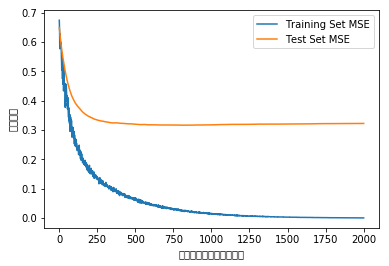

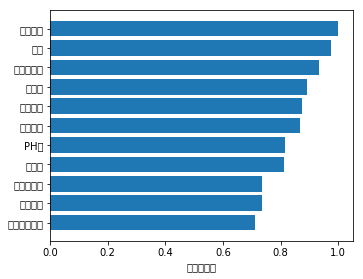

In [10]:
# 采样30%的数据作为测试集
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.30, random_state=531)

# 基于最小均方误差的梯度提升模型
nEst = 2000
depth = 7
learnRate = 0.01
subSamp = 0.5

wineGBMModel = ensemble.GradientBoostingRegressor(
                        n_estimators=nEst,        # 决策树的数目
                        max_depth=depth,          # 决策树的深度
                        learning_rate=learnRate,  # 学习率
                        subsample = subSamp,      # 默认值1就对应"梯度提升"， 小于1就变成"随机梯度提升"
                        loss='ls')                # 损失函数使用最小均方误差

wineGBMModel.fit(xTrain, yTrain)

# 根据梯度提升发产生的一系列模型，生成对应的一系列预测
predictions = wineGBMModel.staged_predict(xTest)

# 计算测试集上的均方误差
msError = []
for p in predictions:
    msError.append(mean_squared_error(yTest, p))

print("MSE" )
print(min(msError))
print(msError.index(min(msError)))

# 绘制均方误差曲线
plt.figure()
plt.plot(range(1, nEst + 1), wineGBMModel.train_score_, label='Training Set MSE')
plt.plot(range(1, nEst + 1), msError, label='Test Set MSE')
plt.legend(loc='upper right')
plt.xlabel(u'集成方法中决策树的数目')
plt.ylabel(u'均方误差')
plt.show()

# 绘制属性重要性
featureImportance = wineGBMModel.feature_importances_

featureImportance = featureImportance / featureImportance.max()
idxSorted = np.argsort(featureImportance)
barPos = np.arange(idxSorted.shape[0]) + .5
plt.barh(barPos, featureImportance[idxSorted], align='center')
plt.yticks(barPos, df.columns[idxSorted])
plt.xlabel(u'变量重要性')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()

MSE
0.3296616666666667


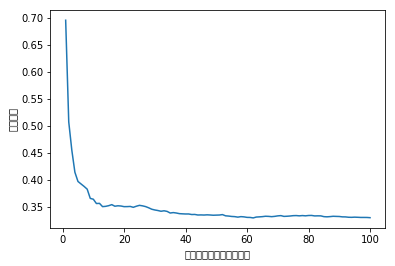

In [11]:
# 采样30%的数据作为测试集
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.30, random_state=1)

# 随机森林规模序列
mseOos = []
nTreeList = range(1, 101)
for iTrees in nTreeList:
    depth = None # 允许决策树深度持续增长
    maxFeat  = 4 # 属性集数目，可试这调整
    
    wineBagModel = ensemble.BaggingRegressor( 
                            n_estimators=iTrees,    # 决策树的数目 
                            oob_score=False,    # 不使用样本外估计
                            random_state=1)     # 随机数生成器的种子 (在真实的模型训练阶段可设置为None)
    wineBagModel.fit(xTrain,yTrain)

    # 收集测试集的均方误差
    prediction = wineBagModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


# 绘制均方误差曲线
plt.plot(nTreeList, mseOos)
plt.xlabel(u'集成方法中决策树的数目')
plt.ylabel(u'均方误差')
#plt.ylim([0.0, 1.1*max(mseOob)])
plt.show()